# Taxi Trip Record Analysis - 2024.01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
taxi_jan_2024 = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_2024])

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
taxi_data.shape

(2964624, 19)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [6]:
taxi_subset = taxi_data.copy()
taxi_subset = taxi_subset[
  [
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'passenger_count',
    'trip_distance',
    'RatecodeID',
    'PULocationID',
    'DOLocationID',
    'payment_type',
    'total_amount'
  ]
]

taxi_subset

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2964619,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,107,263,0,21.77
2964620,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,114,236,0,25.74
2964621,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,211,25,0,23.97
2964622,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,107,13,0,33.46


In [7]:
taxi_subset.hist(figsize=(20,10), bins=60)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

In [15]:
taxi_subset['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

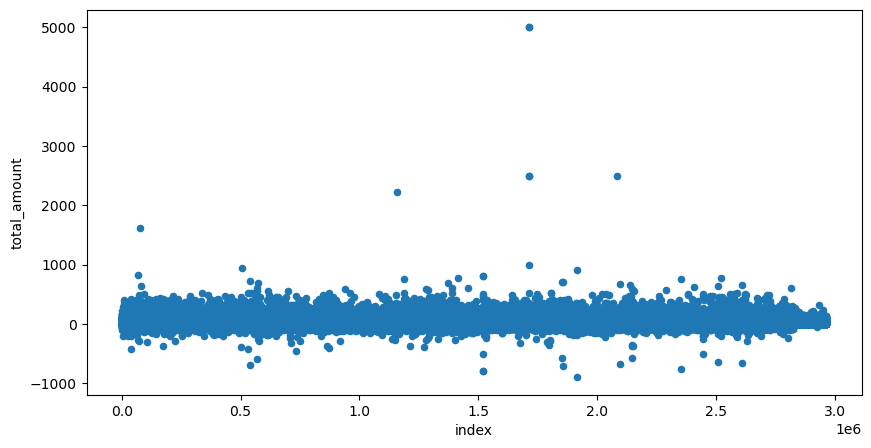

In [16]:
taxi_subset.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()
plt.close()

### Two things to deal with: *Negative Values* and very *high values*.

(35504, 9)
(2964624, 9)


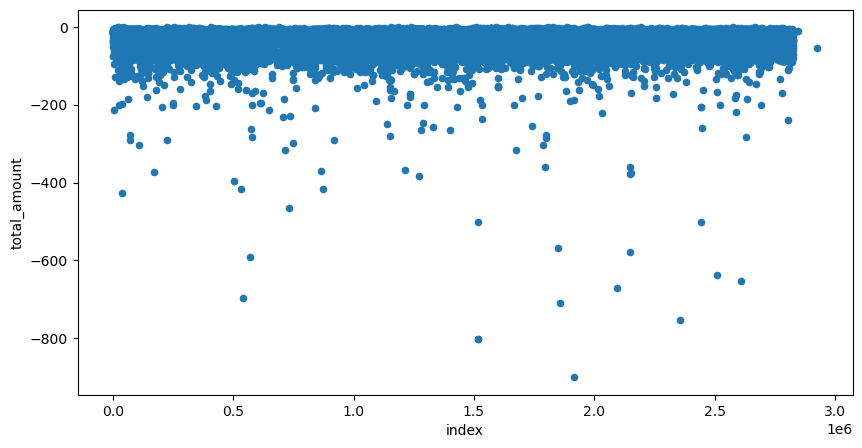

In [20]:
print(taxi_subset[taxi_subset['total_amount'] < 0].shape)
print(taxi_subset.shape)
taxi_subset[taxi_subset['total_amount'] < 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()
plt.close()

In [21]:
taxi_subset[taxi_subset['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [24]:
# Let's check how many negative values per payment type are.
taxi_subset[taxi_subset['total_amount'] < 0]['payment_type'].value_counts()
# 4 - Dispute
# 3 - No charge
# 2 - Cash
# 1 - Credit Card
# 0 - Not valid method.

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

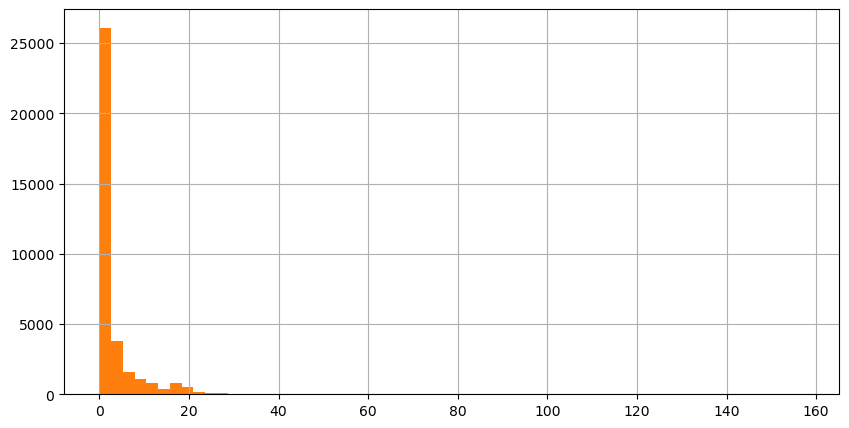

In [26]:
# Trip Distance 
taxi_subset[taxi_subset['total_amount'] < 0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()
plt.close()

In [28]:
# Cero value count
print(taxi_subset[taxi_subset['total_amount'] == 0].shape)
taxi_subset[taxi_subset['total_amount'] == 0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0


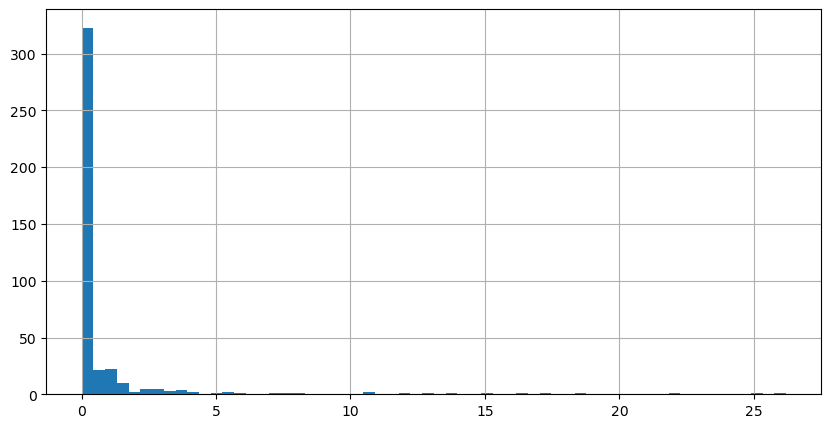

In [29]:
taxi_subset[taxi_subset['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()
plt.close()

In [30]:
taxi_subset[taxi_subset['total_amount'] == 0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

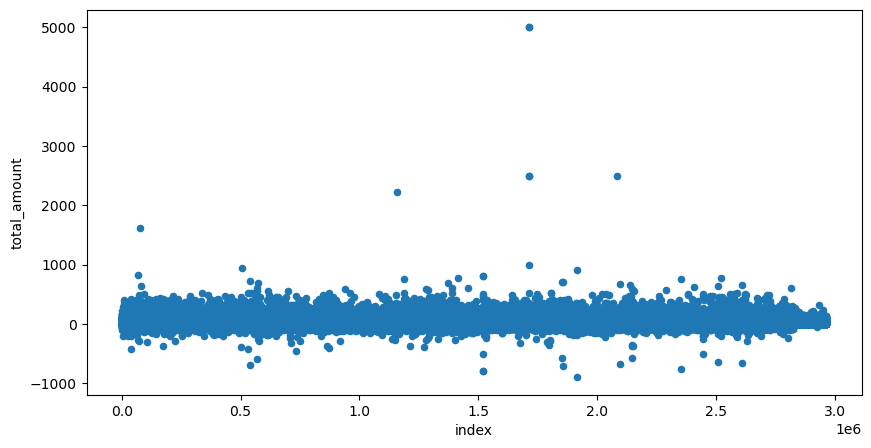

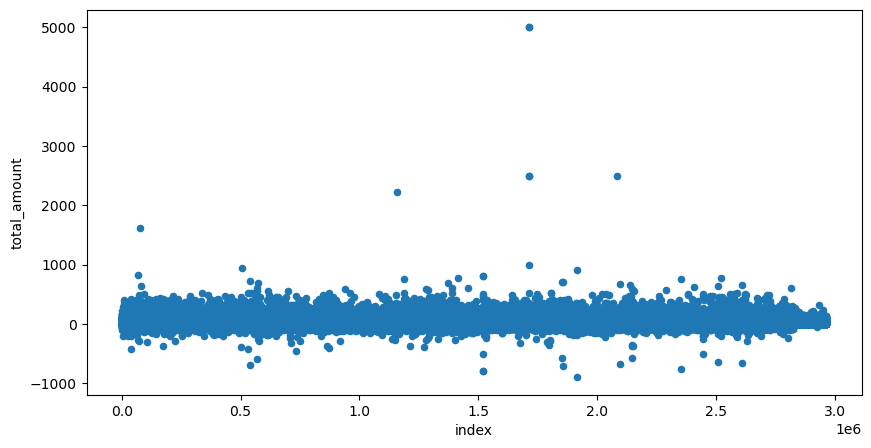

In [32]:
taxi_subset.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()
plt.close()

In [38]:
taxi_subset[taxi_subset['total_amount'] > 200].shape

(2005, 9)

In [35]:
taxi_subset['total_amount'].mean()

26.801504770925415